In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fiftyone.utils.openimages import get_segmentation_classes

In [3]:
ALL_CLASSES = get_segmentation_classes("v7")
LOWER_BY_ALL_CLASSES = {c.lower(): c for c in ALL_CLASSES}

def _clean_and_get(lst):
    res = []
    for c in lst:
        if c.lower() in LOWER_BY_ALL_CLASSES:
            res.append(LOWER_BY_ALL_CLASSES[c.lower()])
        else:
            print("not found:", c)
    return res

In [26]:

P1

['Plastic bag',
 'Drinking straw',
 'Bottle',
 'Envelope',
 'Pen',
 'Pencil case',
 'Eraser',
 'Box']

In [4]:
P1 = [
    "Plastic Bag",
    "Drinking Straw",
    "Bottle",
    "Envelope",
    "Pen",
    "Pencil case",
    "Eraser",
    "Box",
]

P2 = [
    "Coffee cup",
    "Bowl",
    "Drink",
    "Bottle opener",
    "Facial tissue holder",
    "Paper towel",
    "Book",
    "Ruler",
    "Tie",
    "Hat",
]

P3 = [
    "Backpack",
    "Handbag",
    "Luggage and bags",
    "Briefcase",
    
    # clothing
    "Shirt",
    "Shorts",
    "Jeans",
    "Dress",
    "Skirt",
    "Trousers",
    "Sock",
    "Scarf",
    "Sun hat",
    "Swimwear",
    
    # Misc discarded objects
    "Toy",
    "Ball",
    "Balloon",
    "Boot",
    "Watch",
    "Mobile phone",
    "Remote control",
]

In [34]:
import fiftyone

fiftyone.zoo.load_zoo_dataset(
    "open-images-v7",
    label_types=["segmentations"],
    classes=["Plastic bag", "Drinking straw"],
    max_samples=int(10),
    shuffle=True,
    splits=["validation"],
)

 100% |█████████████████████| 10/10 [3.1s elapsed, 0s remaining, 3.2 files/s]      
Dataset info written to '/Users/hariomnarang/fiftyone/open-images-v7/info.json'
Loading existing dataset 'open-images-v7-validation-10'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


Name:        open-images-v7-validation-10
Media type:  image
Num samples: 10
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [5]:
P1 = _clean_and_get(P1)
P2 = _clean_and_get(P2)
P3 = _clean_and_get(P3)

In [35]:
from mtrain.smallnet.unet.openimages import OpenImagesExtractor

In [39]:
ext = OpenImagesExtractor("/Users/hariomnarang/fiftyone/open-images-v7/validation", "./outs")

In [41]:

fiftyone.zoo.load_zoo_dataset(
    "open-images-v7",
    label_types=["segmentations"],
    classes="Plastic bag",
    max_samples=int(100),
    shuffle=True,
    splits=["train"],
)

KeyboardInterrupt: 

In [38]:
ext.extract(["Plastic bag"])

Loading all metadata into memory...
Loading class names...
Loaded 601 class names
  - Loading segmentations.csv...
  - Found 13524 unique images with masks
Building mask location cache...
Cached 6052 mask file locations

Processing 4 images...


Extracting: 100%|██████████| 4/4 [00:00<00:00, 31.89it/s]


Extraction complete!
Images saved to: outs/images
Masks saved to: outs/masks
Class info saved to: outs/masks/*_classes.txt
Successfully processed: 2/4 images


In [19]:
ext.load_class_names()

Loading class names...
Loaded 601 class names


{'/m/011k07': 'Tortoise',
 '/m/011q46kg': 'Container',
 '/m/012074': 'Magpie',
 '/m/0120dh': 'Sea turtle',
 '/m/01226z': 'Football',
 '/m/012n7d': 'Ambulance',
 '/m/012w5l': 'Ladder',
 '/m/012xff': 'Toothbrush',
 '/m/012ysf': 'Syringe',
 '/m/0130jx': 'Sink',
 '/m/0138tl': 'Toy',
 '/m/013y1f': 'Organ (Musical Instrument)',
 '/m/01432t': 'Cassette deck',
 '/m/014j1m': 'Apple',
 '/m/014sv8': 'Human eye',
 '/m/014trl': 'Cosmetics',
 '/m/014y4n': 'Paddle',
 '/m/0152hh': 'Snowman',
 '/m/01599': 'Beer',
 '/m/01_5g': 'Chopsticks',
 '/m/015h_t': 'Human beard',
 '/m/015p6': 'Bird',
 '/m/015qbp': 'Parking meter',
 '/m/015qff': 'Traffic light',
 '/m/015wgc': 'Croissant',
 '/m/015x4r': 'Cucumber',
 '/m/015x5n': 'Radish',
 '/m/0162_1': 'Towel',
 '/m/0167gd': 'Doll',
 '/m/016m2d': 'Skull',
 '/m/0174k2': 'Washing machine',
 '/m/0174n1': 'Glove',
 '/m/0175cv': 'Tick',
 '/m/0176mf': 'Belt',
 '/m/017ftj': 'Sunglasses',
 '/m/018j2': 'Banjo',
 '/m/018p4k': 'Cart',
 '/m/018xm': 'Ball',
 '/m/01940j': 'Backpa

In [ ]:
image_to_masks[next(iter(image_to_masks.keys()))]

[{'filename': '114d6b81e7b1fa08_m01bl7v_b62eb236.png',
  'label_id': '/m/01bl7v',
  'label_name': '/m/01bl7v'},
 {'filename': '114d6b81e7b1fa08_m05r655_69734b16.png',
  'label_id': '/m/05r655',
  'label_name': '/m/05r655'},
 {'filename': '114d6b81e7b1fa08_m03bt1vf_32cee104.png',
  'label_id': '/m/03bt1vf',
  'label_name': '/m/03bt1vf'},
 {'filename': '114d6b81e7b1fa08_m01bl7v_e0f20838.png',
  'label_id': '/m/01bl7v',
  'label_name': '/m/01bl7v'}]

In [7]:
from mtrain.smallnet.unet.extract import show_extracted_dataset

results: 16


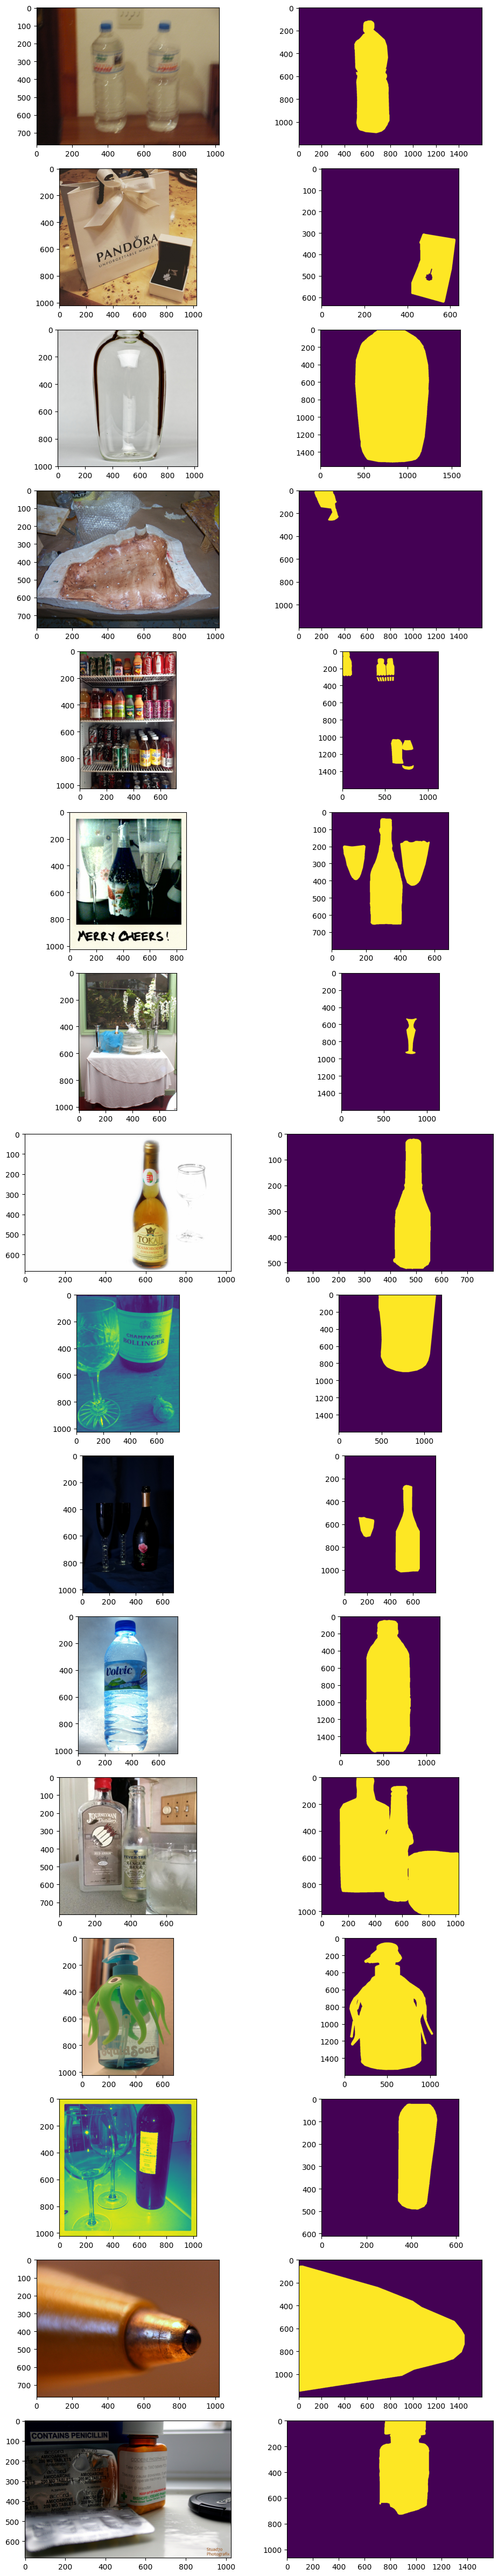

In [7]:
from pathlib import Path
show_extracted_dataset(Path("./test-openimages"), 16)

In [8]:
from mtrain.smallnet.unet.openimages import download_and_extract

In [11]:
download_and_extract({10: P1}, "./out-dir-1")

output directory exists at out-dir-1, nuking
CACHE MISS: triggering data generation
10 ['Bottle', 'Box', 'Drinking straw', 'Envelope', 'Eraser', 'Pen', 'Pencil case', 'Plastic bag']
 100% |█████████████████████| 10/10 [4.7s elapsed, 0s remaining, 2.1 files/s]      
Dataset info written to '/Users/hariomnarang/fiftyone/open-images-v7/info.json'
Loading 'open-images-v7' split 'validation'
 100% |███████████████████| 10/10 [642.5ms elapsed, 0s remaining, 15.6 samples/s]  
Dataset 'open-images-v7-validation-10' created
Loading all metadata into memory...
  - Loading segmentations.csv...
failure in data generation function, deleting cache directory at /Users/hariomnarang/.mtrain_synth_cache/_download_and_extract_cacheable_75df3eac02e01e3f, reason=[Errno 2] No such file or directory: '/Users/hariomnarang/fiftyone/open-images-v7/train/labels/segmentations.csv'. Will re-raise the exception, please do not interrupt, else the cache would be corrupted


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hariomnarang/fiftyone/open-images-v7/train/labels/segmentations.csv'